In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [ ]:

# Load the Druglib.com dataset
druglib_train = pd.read_csv('/content/drive/MyDrive/drug_dataset/Drug Reviews (Druglib.com)/drugLibTrain_raw.csv')
druglib_test = pd.read_csv('/content/drive/MyDrive/drug_dataset/Drug Reviews (Druglib.com)/drugLibTest_raw.csv')



# Overview of the Data


In [ ]:
druglib_train.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


# Descriptive Statistics

In [ ]:
# Get basic information and descriptive statistics
print("Druglib.com Train Dataset Info")
print(druglib_train.info())

Druglib.com Train Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB
None


In [ ]:
# Get basic information and descriptive statistics
print("Druglib.com test Dataset Info")
print(druglib_test.info())

Druglib.com test Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1036 non-null   int64 
 1   urlDrugName        1036 non-null   object
 2   rating             1036 non-null   int64 
 3   effectiveness      1036 non-null   object
 4   sideEffects        1036 non-null   object
 5   condition          1036 non-null   object
 6   benefitsReview     1031 non-null   object
 7   sideEffectsReview  1013 non-null   object
 8   commentsReview     1035 non-null   object
dtypes: int64(2), object(7)
memory usage: 73.0+ KB
None


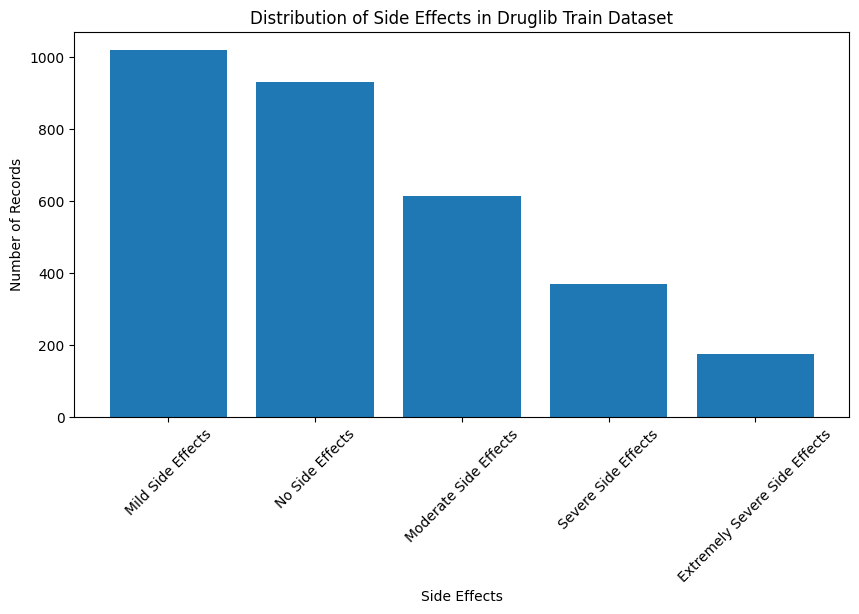

In [ ]:

# Count the number of records for each sideEffects class
side_effects_counts = druglib_train['sideEffects'].value_counts()

# Visualize the counts
plt.figure(figsize=(10, 5))
plt.bar(side_effects_counts.index, side_effects_counts.values)
plt.xlabel('Side Effects')
plt.ylabel('Number of Records')
plt.title('Distribution of Side Effects in Druglib Train Dataset')
plt.xticks(rotation=45)
plt.show()


In [ ]:
side_effects_counts

,count
sideEffects,
Mild Side Effects,330
No Side Effects,268
Moderate Side Effects,236
Severe Side Effects,122
Extremely Severe Side Effects,80


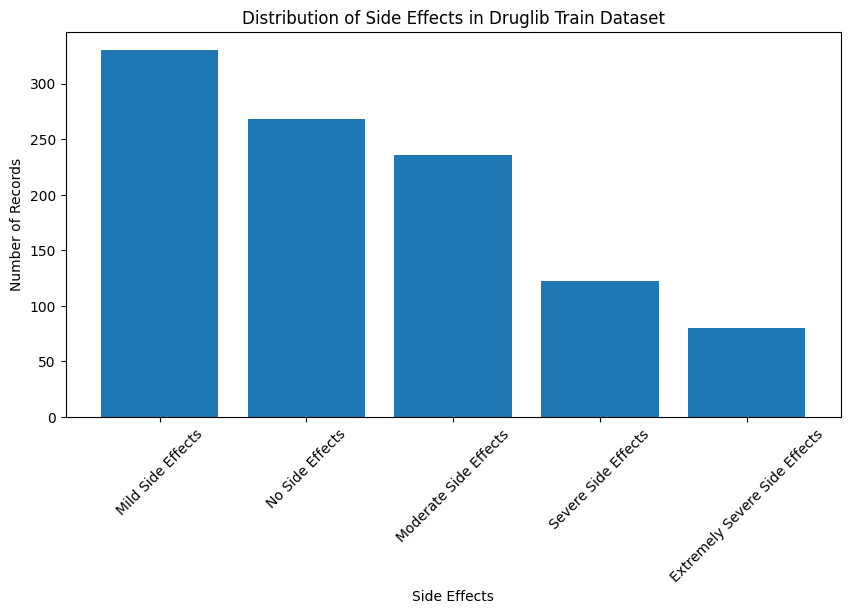

In [ ]:

# Count the number of records for each sideEffects class
side_effects_counts = druglib_test['sideEffects'].value_counts()

# Visualize the counts
plt.figure(figsize=(10, 5))
plt.bar(side_effects_counts.index, side_effects_counts.values)
plt.xlabel('Side Effects')
plt.ylabel('Number of Records')
plt.title('Distribution of Side Effects in Druglib Train Dataset')
plt.xticks(rotation=45)
plt.show()


# Fill empty columns

In [ ]:
# Fill NaN values with an empty string in the text columns
druglib_train['benefitsReview'].fillna('', inplace=True)
druglib_train['sideEffectsReview'].fillna('', inplace=True)
druglib_train['commentsReview'].fillna('', inplace=True)

# Text Analysis

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure stopwords are downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Define normalization function using nltk
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import string

def normalize_text(text):
    if isinstance(text, str):
        # Tokenize the text
        words = word_tokenize(text.lower())
        # Remove punctuation and stop words
        filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
        return ' '.join(filtered_words)
    else:
        return ""

In [ ]:
# Normalize text columns
druglib_train['benefitsReview'] = druglib_train['benefitsReview'].apply(normalize_text)
druglib_train['sideEffectsReview'] = druglib_train['sideEffectsReview'].apply(normalize_text)
druglib_train['commentsReview'] = druglib_train['commentsReview'].apply(normalize_text)
druglib_test['benefitsReview'] = druglib_test['benefitsReview'].apply(normalize_text)
druglib_test['sideEffectsReview'] = druglib_test['sideEffectsReview'].apply(normalize_text)
druglib_test['commentsReview'] = druglib_test['commentsReview'].apply(normalize_text)

# Pre-processing

## Handle missing values

In [ ]:
# Handle missing values
druglib_train.fillna('', inplace=True)
druglib_test.fillna('', inplace=True)

## Drop unnecessary columns

In [ ]:
# Drop unnecessary columns
druglib_train.drop(columns=['Unnamed: 0'], inplace=True)
druglib_test.drop(columns=['Unnamed: 0'], inplace=True)


In [ ]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

## Cleaning the Data

In [ ]:
# Define a function to clean text
def clean_text(text):
    if isinstance(text, str):
        # Remove HTML tags using BeautifulSoup
        soup = BeautifulSoup(text, 'html.parser')
        text = soup.get_text()

        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # Lowercase the text
        text = text.lower()

        # Remove special characters and numbers
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\d+', '', text)      # Remove numbers

        # Tokenize text
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        # Rejoin tokens into a string
        return ' '.join(tokens)
    return text


In [ ]:
# Clean the review text columns
druglib_train['benefitsReview'] = druglib_train['benefitsReview'].apply(clean_text)
druglib_train['sideEffectsReview'] = druglib_train['sideEffectsReview'].apply(clean_text)
druglib_train['commentsReview'] = druglib_train['commentsReview'].apply(clean_text)

druglib_test['benefitsReview'] = druglib_test['benefitsReview'].apply(clean_text)
druglib_test['sideEffectsReview'] = druglib_test['sideEffectsReview'].apply(clean_text)
druglib_test['commentsReview'] = druglib_test['commentsReview'].apply(clean_text)


In [ ]:
# Apply the cleaning function to the 'condition' column
druglib_train['condition'] = druglib_train['condition'].apply(clean_text)
druglib_test['condition'] = druglib_test['condition'].apply(clean_text)


<ipython-input-18-ea5a24797533>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [ ]:
df_train = druglib_train.copy()
df_test = druglib_test.copy()

In [ ]:
df_train['benefitsReview_len'] = df_train['benefitsReview'].apply(lambda x: len(x.split()))
df_train['sideEffectsReview_len'] = df_train['sideEffectsReview'].apply(lambda x: len(x.split()))
df_train['commentsReview_len'] = df_train['commentsReview'].apply(lambda x: len(x.split()))
df_train['condition_len'] = df_train['condition'].apply(lambda x: len(x.split()))

df_test['benefitsReview_len'] = df_test['benefitsReview'].apply(lambda x: len(x.split()))
df_test['sideEffectsReview_len'] = df_test['sideEffectsReview'].apply(lambda x: len(x.split()))
df_test['commentsReview_len'] = df_test['commentsReview'].apply(lambda x: len(x.split()))
df_test['condition_len'] = df_test['condition'].apply(lambda x: len(x.split()))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# or Label Encoding if there are too many categories
le = LabelEncoder()
df_train['urlDrugName'] = le.fit_transform(df_train['urlDrugName'])
df_train['sideEffects'] = le.fit_transform(df_train['sideEffects'])
df_train['effectiveness'] = le.fit_transform(df_train['effectiveness'])

df_test['urlDrugName'] = le.fit_transform(df_test['urlDrugName'])
df_test['sideEffects'] = le.fit_transform(df_test['sideEffects'])
df_test['effectiveness'] = le.fit_transform(df_test['effectiveness'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# or Normalizing
normalizer = MinMaxScaler()
df_train['rating'] = normalizer.fit_transform(df_train[['rating']])
df_test['rating'] = normalizer.fit_transform(df_test[['rating']])

df_train['benefitsReview_len'] = normalizer.fit_transform(df_train[['benefitsReview_len']])
df_train['sideEffectsReview_len'] = normalizer.fit_transform(df_train[['sideEffectsReview_len']])
df_train['commentsReview_len'] = normalizer.fit_transform(df_train[['commentsReview_len']])
df_train['condition_len'] = normalizer.fit_transform(df_train[['condition_len']])

df_test['benefitsReview_len'] = normalizer.fit_transform(df_test[['benefitsReview_len']])
df_test['sideEffectsReview_len'] = normalizer.fit_transform(df_test[['sideEffectsReview_len']])
df_test['commentsReview_len'] = normalizer.fit_transform(df_test[['commentsReview_len']])
df_test['condition_len'] = normalizer.fit_transform(df_test[['condition_len']])


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

# TF-IDF Vectorization for Train
tfidf = TfidfVectorizer(max_features=500)  # Limit to top 500 features
train_benefits_tfidf = tfidf.fit_transform(df_train['benefitsReview'])
train_sideEffects_tfidf = tfidf.fit_transform(df_train['sideEffectsReview'])
train_comments_tfidf = tfidf.fit_transform(df_train['commentsReview'])
train_condition_tfidf = tfidf.fit_transform(df_train['condition'])

# TF-IDF Vectorization for Test
test_benefits_tfidf = tfidf.fit_transform(df_test['benefitsReview'])
test_sideEffects_tfidf = tfidf.fit_transform(df_test['sideEffectsReview'])
test_comments_tfidf = tfidf.fit_transform(df_test['commentsReview'])
test_condition_tfidf = tfidf.fit_transform(df_test['condition'])



In [ ]:
# Convert sparse matrices to DataFrames
train_benefits_df = pd.DataFrame(train_benefits_tfidf.toarray(), columns=[f'benefits_tfidf_{i}' for i in range(train_benefits_tfidf.shape[1])])
train_sideEffects_df = pd.DataFrame(train_sideEffects_tfidf.toarray(), columns=[f'sideEffects_tfidf_{i}' for i in range(train_sideEffects_tfidf.shape[1])])
train_comments_df = pd.DataFrame(train_comments_tfidf.toarray(), columns=[f'comments_tfidf_{i}' for i in range(train_comments_tfidf.shape[1])])
train_condition_df = pd.DataFrame(train_condition_tfidf.toarray(), columns=[f'condition_tfidf_{i}' for i in range(train_condition_tfidf.shape[1])])

# Concatenate TF-IDF DataFrames with the original DataFrame
df_train = pd.concat([df_train, train_benefits_df, train_sideEffects_df, train_comments_df, train_condition_df], axis=1)


In [ ]:
# Convert sparse matrices to DataFrames
test_benefits_df = pd.DataFrame(test_benefits_tfidf.toarray(), columns=[f'benefits_tfidf_{i}' for i in range(test_benefits_tfidf.shape[1])])
test_sideEffects_df = pd.DataFrame(test_sideEffects_tfidf.toarray(), columns=[f'sideEffects_tfidf_{i}' for i in range(test_sideEffects_tfidf.shape[1])])
test_comments_df = pd.DataFrame(test_comments_tfidf.toarray(), columns=[f'comments_tfidf_{i}' for i in range(test_comments_tfidf.shape[1])])
test_condition_df = pd.DataFrame(test_condition_tfidf.toarray(), columns=[f'condition_tfidf_{i}' for i in range(test_condition_tfidf.shape[1])])

# Concatenate TF-IDF DataFrames with the original DataFrame
df_test = pd.concat([df_test, test_benefits_df, test_sideEffects_df, test_comments_df, test_condition_df], axis=1)


In [ ]:
# Sentiment Analysis
df_train['benefits_sentiment'] = df_train['benefitsReview'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_train['comments_sentiment'] = df_train['commentsReview'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_train['sideEffectsReview_sentiment'] = df_train['sideEffectsReview'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
# Sentiment Analysis
df_test['benefits_sentiment'] = df_test['benefitsReview'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_test['comments_sentiment'] = df_test['commentsReview'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_test['sideEffectsReview_sentiment'] = df_test['sideEffectsReview'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
import gensim.downloader as api
import numpy as np

# Load pre-trained Word2Vec model
model = api.load('word2vec-google-news-300')




[===-----------------------------------------------] 7.7% 128.6/1662.8MB downloaded

KeyboardInterrupt: 

In [ ]:
def get_w2v_vector(text, vector_size=500):
    tokens = text.split()
    vectors = [model[word] for word in tokens if word in model]
    if len(vectors) > 0:
        mean_vector = np.mean(vectors, axis=0)
    else:
        mean_vector = np.zeros(model.vector_size)  # Assuming the model's default vector size

    # Truncate or pad to the desired vector size
    if len(mean_vector) > vector_size:
        return mean_vector[:vector_size]
    elif len(mean_vector) < vector_size:
        return np.pad(mean_vector, (0, vector_size - len(mean_vector)))
    else:
        return mean_vector


In [ ]:
df_train['benefits_w2v'] = df_train['benefitsReview'].apply(get_w2v_vector)
df_train['sideEffects_w2v'] = df_train['sideEffectsReview'].apply(get_w2v_vector)
df_train['condition_w2v'] = df_train['condition'].apply(get_w2v_vector)
df_train['comments_w2v'] = df_train['commentsReview'].apply(get_w2v_vector)


In [ ]:
df_test['benefits_w2v'] = df_test['benefitsReview'].apply(get_w2v_vector)
df_test['sideEffects_w2v'] = df_test['sideEffectsReview'].apply(get_w2v_vector)
df_test['condition_w2v'] = df_test['condition'].apply(get_w2v_vector)
df_test['comments_w2v'] = df_test['commentsReview'].apply(get_w2v_vector)

In [ ]:
def flatten_array_column(df, col_name, vector_size):
    flattened_df = pd.DataFrame(df[col_name].tolist(), columns=[f'{col_name}_{i}' for i in range(vector_size)])
    return pd.concat([df, flattened_df], axis=1).drop(columns=[col_name])

# Flatten vector columns
df_train = flatten_array_column(df_train, 'benefits_w2v', 500)
df_train = flatten_array_column(df_train, 'sideEffects_w2v', 500)
df_train = flatten_array_column(df_train, 'condition_w2v', 500)
df_train = flatten_array_column(df_train, 'comments_w2v', 500)


In [ ]:
# Flatten vector columns
df_test = flatten_array_column(df_test, 'benefits_w2v', 500)
df_test = flatten_array_column(df_test, 'sideEffects_w2v', 500)
df_test = flatten_array_column(df_test, 'condition_w2v', 500)
df_test = flatten_array_column(df_test, 'comments_w2v', 500)


In [ ]:
# Drop original text columns if not needed
df_train.drop(columns=['benefitsReview', 'sideEffectsReview', 'commentsReview', 'condition'], inplace=True)
df_test.drop(columns=['benefitsReview', 'sideEffectsReview', 'commentsReview',  'condition'], inplace=True)

In [ ]:
# df_train.to_csv('druglib_train_cleaned.csv', index=False)
# df_test.to_csv('druglib_test_cleaned.csv', index=False)

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/drug_dataset/druglib_train_cleaned.csv')
df_test = pd.read_csv('/content/drive/MyDrive/drug_dataset/druglib_test_cleaned.csv')

In [ ]:
df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

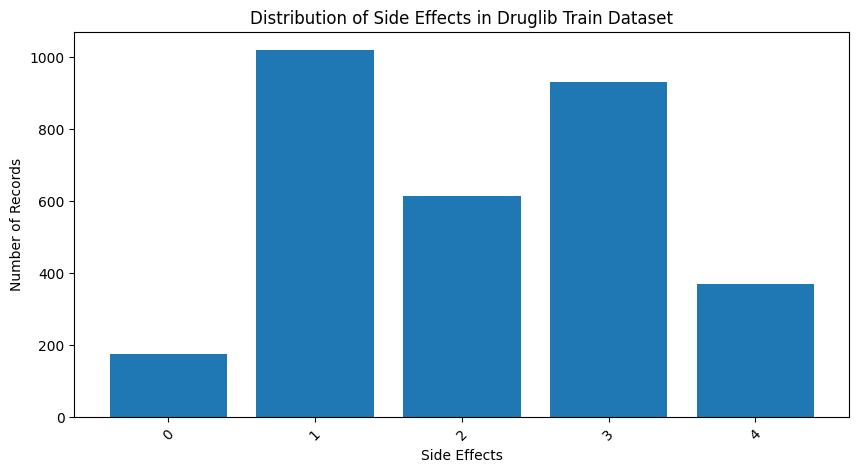

In [ ]:
# Count the number of records for each sideEffects class
side_effects_counts = df_train['sideEffects'].value_counts()

# Visualize the counts
plt.figure(figsize=(10, 5))
plt.bar(side_effects_counts.index, side_effects_counts.values)
plt.xlabel('Side Effects')
plt.ylabel('Number of Records')
plt.title('Distribution of Side Effects in Druglib Train Dataset')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Select rows where 'sideEffects' is 0 or 4
df_train_filtered = df_train[df_train['sideEffects'].isin([1, 3])]
df_test_filtered = df_test[df_test['sideEffects'].isin([1, 3])]


## For Multiple Classes

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


In [ ]:

# For training set
X_train = df_train.drop(columns=['sideEffects'])
y_train = df_train['sideEffects']

# For test set
X_test = df_test.drop(columns=['sideEffects'])
y_test = df_test['sideEffects']


# RandomForest

In [ ]:
param_grid = {
    'n_estimators': [500, 1000, 2000,5000],
    'max_depth': [10, 20, 30, 40],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [ ]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,  # Number of cross-validation folds
                           n_jobs=-1,  # Use all available CPUs
                           verbose=2,  # Print progress
                           scoring='accuracy')  # Use accuracy as the evaluation metric

# Fit GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
71 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", l

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500, 1000, 2000, 5000]},
             scoring='accuracy', verbose=2)

In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'max_depth': 40, 'max_features': 'sqrt', 'n_estimators': 1000}
Accuracy: 0.5096525096525096
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.11      0.20        80
           1       0.43      0.95      0.59       330
           2       0.33      0.10      0.15       236
           3       0.88      0.63      0.74       268
           4       0.40      0.11      0.18       122

    accuracy                           0.51      1036
   macro avg       0.56      0.38      0.37      1036
weighted avg       0.55      0.51      0.45      1036



## Binary Class

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


In [ ]:

# For training set
X_train = df_train_filtered.drop(columns=['sideEffects'])
y_train = df_train_filtered['sideEffects']

# For test set
X_test = df_test_filtered.drop(columns=['sideEffects'])
y_test = df_test_filtered['sideEffects']


# RandomForest

In [ ]:
param_grid = {
    'n_estimators': [500, 1000, 2000,5000],
    'max_depth': [10, 20, 30, 40],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [ ]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,  # Number of cross-validation folds
                           n_jobs=-1,  # Use all available CPUs
                           verbose=2,  # Print progress
                           scoring='accuracy')  # Use accuracy as the evaluation metric

# Fit GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500, 1000, 2000, 5000]},
             scoring='accuracy', verbose=2)

In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 5000}
Accuracy: 0.81438127090301
Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.97      0.85       330
           3       0.94      0.63      0.75       268

    accuracy                           0.81       598
   macro avg       0.85      0.80      0.80       598
weighted avg       0.84      0.81      0.81       598

